# Weight Decay And Saddle Points

### Weight Decay

One of the things that could help your learning algorithm is to reduce the learning rate, that's what we call weight decay.

What's the intuition behind why a slow learning rate is better at the end? Image your model weights as 2 points on a surface. At the beginning we are very far from our target direction, so it's easy to roughly tweak the weights to point toward north or south. But as trianing goes, the landscape becomes more complicated, more intricate, like a canyon, we can't just go north or south. We need to find the right veins, we need to take careful steps.

So the idea is to decrease the learning rate over the optimizer steps. One way to do that is to exponentially reduce the learning rate.

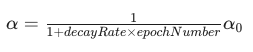

In [ ]:
def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer
    decay_rate -- Decay rate. Scalar

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """

    # same as lr0^decay_rate*epoch_num
    lr = learning_rate0 / (1 + decay_rate * epoch_num)
    return lr

### Scheduling

 If you set the decay to occur at every epoch, the learning rate goes to zero too quickly - even if you start with a higher learning rate. This can be fixed with fixed interval scheduling.

In [ ]:
def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer.
    decay_rate -- Decay rate. Scalar.
    time_interval -- Number of epochs where you update the learning rate.

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    learning_rate = learning_rate0 / (1 + decay_rate * (np.floor(epoch_num/time_interval)))
    return learning_rate

### The Truth About Local Optimums

Often when we think about a model not converging, the most common analogy is that the optimizer is trapped into a hole; what we call local optimums.

Thing is in a high dimensional space, these traps don't really look like holes, they look more like saddle points. Think about when would an optimizer be stuck: it would mean that the gradient is zero or very small, meaning that the optimizer doesn't know which direction; the area is ambiguous. These are saddle points.

If the gradient is zero, the function is either convex light or concave light. So, the optimizer are stuck in plateaus actually, not in holes!

As Andrew Ng said, because we are dealing with such high dimensional spaces, it's still hard for people to grasp what these dimensions really look like, even if dimensional reduction techniques.